<a href="https://colab.research.google.com/github/RTae/CPE213/blob/main/week9/lab/CPE213_Code_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1 : Pi Estimation

In [6]:
library("tidyverse")

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.0     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



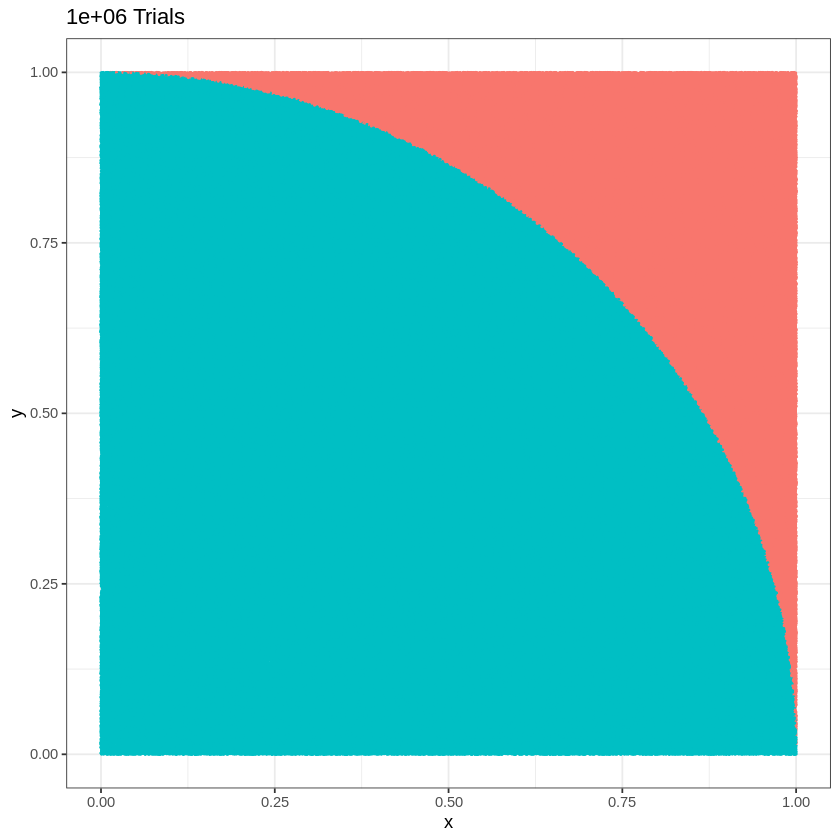

In [49]:
N <- 1000000
x <- runif(n=N, min=0,max=1)
y <- runif(n=N, min=0,max=1)

radia <- sqrt(x**2 + y**2)
inbound <- radia < 1

pi_estimate = 4*(1*1)*(sum(inbound)/N)

ggplot(data.frame(x, y, inbound), aes(x, y, color=inbound)) +
  theme_bw() +
  ggtitle(paste(round(N), 'Trials')) +
  guides(color=FALSE) +
  geom_point(size=0.2) +
  ggtitle(paste(N, 'Trials'))

In [70]:
errors <- NULL
n <- seq(1,8)
for (i in n){
  N <- 10**i
  x <- runif(n=N, min=0,max=1)
  y <- runif(n=N, min=0,max=1)

  radia <- sqrt(x**2 + y**2)
  inbound <- radia < 1

  pi_estimate = 4*(1*1)*(sum(inbound)/N)
  error = abs(pi - pi_estimate)

  errors <- c(errors, error)
}

In [91]:
errors

[1] 5.840735e-02 5.840735e-02 9.592654e-03 9.592654e-03 5.112654e-03
[6] 8.006536e-04 2.993464e-04 7.753359e-05

`geom_smooth()` using formula 'y ~ x'



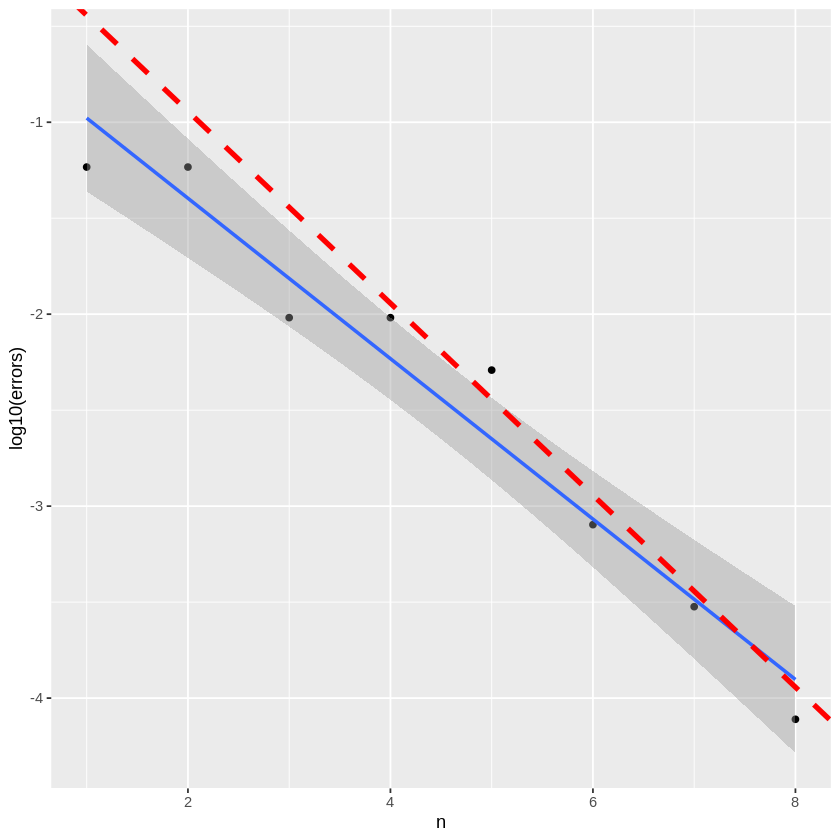

In [90]:
ggplot(data.frame(n, errors)) + 
  geom_point(aes(x = n, y = log10(errors))) + 
  geom_smooth(aes(x = n, y = log10(errors)), method='lm') + 
  geom_abline(intercept = 0.0569, slope = -1/2, color="red", linetype="dashed", size=1.5)

In [78]:
summary(lm(errors~n))


Call:
lm(formula = errors ~ n)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0212241 -0.0093819  0.0001376  0.0108364  0.0189037 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)   
(Intercept)  0.056878   0.011616   4.896  0.00272 **
n           -0.008687   0.002300  -3.776  0.00922 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01491 on 6 degrees of freedom
Multiple R-squared:  0.7039,	Adjusted R-squared:  0.6545 
F-statistic: 14.26 on 1 and 6 DF,  p-value: 0.009219


# Task 2: Saleman problem

In [3]:
copies = 20
cost_price = 30
sold_price = 50
# Observed Data
weeks <- c(1, 2, 4, 9, 10, 15, 16, 15, 12, 9, 4, 2, 1, 0)
demand <- c(13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26)
# Create Prob and Cum table
data <- data.frame(
  demand,
  weeks,
  prob = weeks/sum(weeks),
  cum = cumsum(weeks/sum(weeks))
)
rawdata <- rep(demand, weeks)

# Simulate next 12 weeks
sim_table <- data.frame(
  rad = c(0.4175, 0.8434, 0.5227, 0.1624, 0.0149, 0.0067, 0.0957, 0.6233, 0.9990, 0.0391, 0.2901, 0.0779)
)
sim_table$demand = ceiling(quantile(rawdata, sim_table$rad))
sim_table$sold = ifelse(sim_table$demand <= copies, sim_table$demand, copies)
sim_table$thrown = ifelse(sim_table$demand > copies, 0, copies - sim_table$demand)
sim_table$revenue = sim_table$sold * sold_price
sim_table$cost = copies * cost_price
sim_table$profit = sim_table$revenue - sim_table$cost

In [6]:
data

demand,weeks,prob,cum
<dbl>,<dbl>,<dbl>,<dbl>
13,1,0.01,0.01
14,2,0.02,0.03
15,4,0.04,0.07
16,9,0.09,0.16
17,10,0.10,0.26
18,15,0.15,0.41
19,16,0.16,0.57
20,15,0.15,0.72
21,12,0.12,0.84


In [5]:
sim_table

rad,demand,sold,thrown,revenue,cost,profit
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.4175,19,19,1,950,600,350
0.8434,22,20,0,1000,600,400
0.5227,19,19,1,950,600,350
0.1624,17,17,3,850,600,250
0.0149,14,14,6,700,600,100
0.0067,14,14,6,700,600,100
0.0957,16,16,4,800,600,200
0.6233,20,20,0,1000,600,400
0.9990,25,20,0,1000,600,400


In [23]:
sum(tab$profit)

[1] 3200

# Task 3: Simulation from Data

In [1]:
df <- read.csv("http://fastdata.in.th/data-model-2021/superstore.csv", sep="|")

In [2]:
df

Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Country,City,⋯,Postal.Code,Region,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit
<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<dbl>,<dbl>
1,CA-2013-152156,2014-11-09T00:00:00Z,2014-11-12T00:00:00Z,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,⋯,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
2,CA-2013-152156,2014-11-09T00:00:00Z,2014-11-12T00:00:00Z,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,⋯,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs, Rounded Back",731.9400,3,0.00,219.5820
3,CA-2013-138688,2014-06-13T00:00:00Z,2014-06-17T00:00:00Z,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,⋯,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters by Universal,14.6200,2,0.00,6.8714
4,US-2012-108966,2013-10-11T00:00:00Z,2013-10-18T00:00:00Z,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,⋯,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,US-2012-108966,2013-10-11T00:00:00Z,2013-10-18T00:00:00Z,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,⋯,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
6,CA-2011-115812,2012-06-09T00:00:00Z,2012-06-14T00:00:00Z,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,⋯,90032,West,FUR-FU-10001487,Furniture,Furnishings,"Eldon Expressions Wood and Plastic Desk Accessories, Cherry Wood",48.8600,7,0.00,14.1694
7,CA-2011-115812,2012-06-09T00:00:00Z,2012-06-14T00:00:00Z,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,⋯,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
8,CA-2011-115812,2012-06-09T00:00:00Z,2012-06-14T00:00:00Z,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,⋯,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
9,CA-2011-115812,2012-06-09T00:00:00Z,2012-06-14T00:00:00Z,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,⋯,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by Samsill,18.5040,3,0.20,5.7825


## 1

`summarise()` has grouped output by 'Order.Date'. You can override using the `.groups` argument.



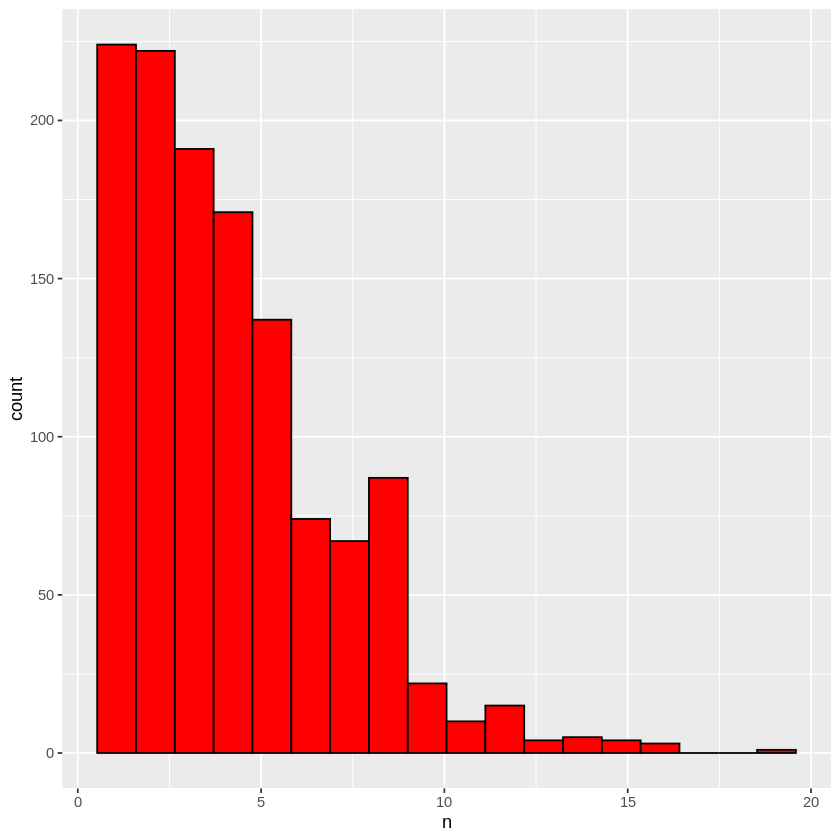

In [7]:
orderByDate <- df %>% 
  group_by(Order.Date, Order.ID	) %>% 
  summarise(n = 1) %>%
  summarise(n = sum(n))

ggplot(orderByDate) + 
  geom_histogram(aes(x = n), fill='red',color='black',bins=18)

## 2

In [8]:
processigTimeEachCat <- df %>% 
                          mutate(processingTime = as.Date(Ship.Date) - as.Date(Order.Date)) %>%
                          group_by(Category) %>% 
                          summarise(avgTime = mean(processingTime))

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



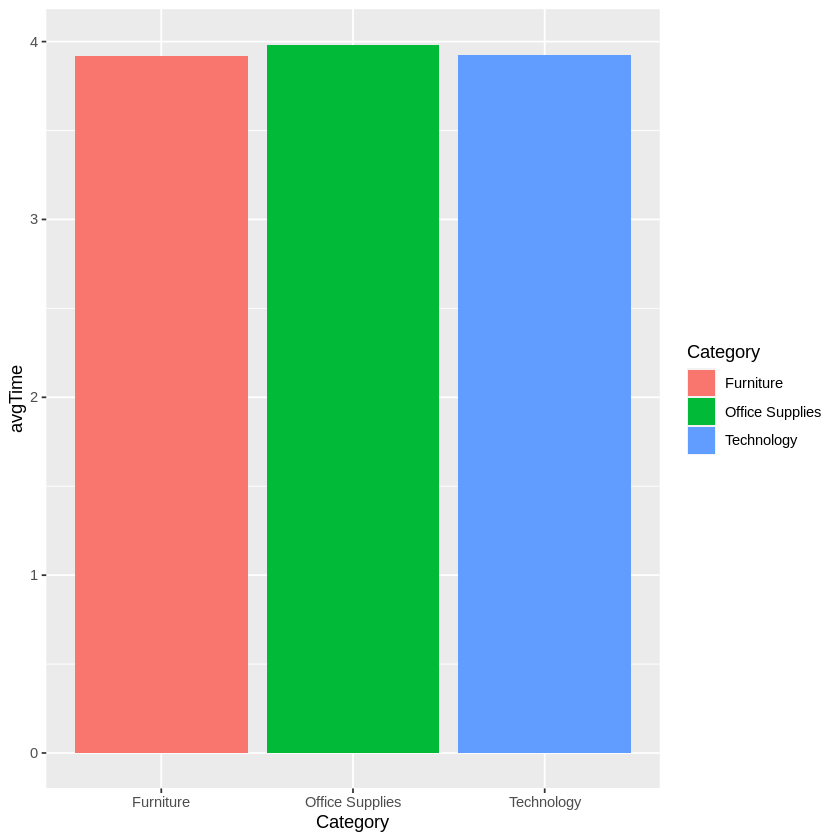

In [9]:
ggplot(processigTimeEachCat) + 
geom_col(aes(x = Category, y = avgTime, fill=Category))

# 3

In [10]:
processsingTimeDist <- df %>% 
                        mutate(processingTime = as.Date(Ship.Date) - as.Date(Order.Date))

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.



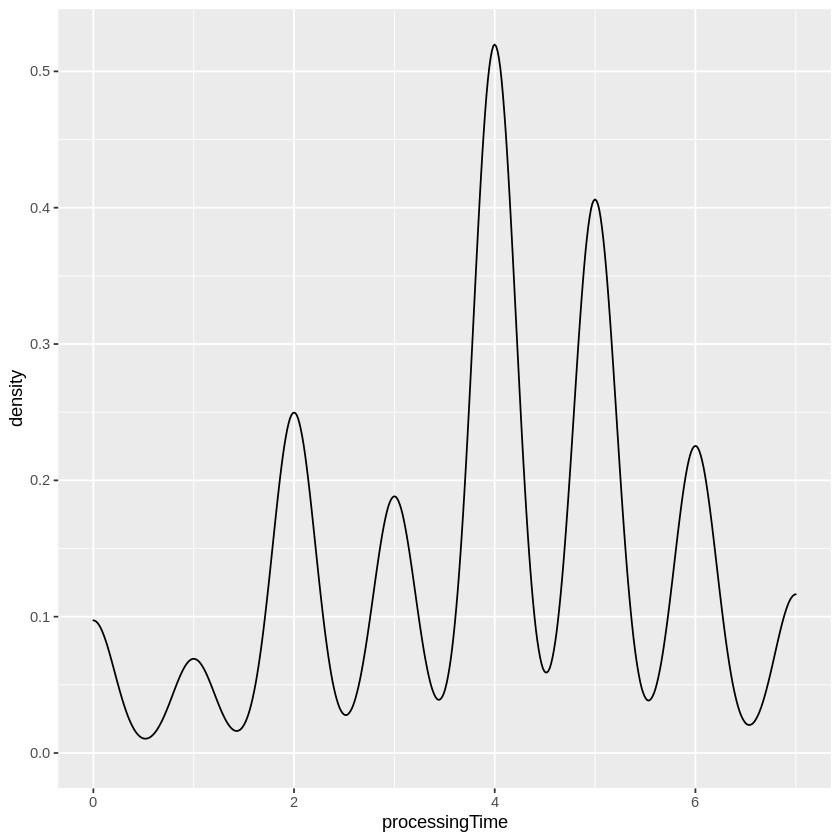

In [11]:
ggplot(processsingTimeDist) + 
  geom_density(aes(x = processingTime))

## 4

In [26]:
orderProcessingTime <- df %>% 
  mutate(processingTime = as.Date(Ship.Date) - as.Date(Order.Date)) %>%
  select(processingTime)

orderByDate <- df %>% 
  group_by(Order.Date) %>% 
  summarise(n = n())

x <- quantile(orderByDate$n, runif(10))
y <- quantile(orderProcessingTime$processingTime, runif(10))

df_sim <- data.frame(x, y)
names(df_sim) <- c('numberOfOrder', 'processingTime')
df_sim
print(paste0("Average number of order: ", mean(x)))
print(paste0("Average Processing time: ", mean(y)))

,numberOfOrder,processingTime
,<dbl>,<drtn>
75.2358%,12,3 days
59.78235%,8,6 days
28.26439%,4,2 days
16.04654%,2,4 days
52.8008%,7,4 days
65.87386%,9,4 days
44.75241%,6,4 days
78.71847%,13,6 days
81.48462%,13,4 days


[1] "Average number of order: 8.5"
[1] "Average Processing time: 4.2"


# 5

In [103]:
orderSizeATime <- df %>% 
                    group_by(Order.ID) %>% 
                    mutate(processingTime = as.Date(Ship.Date) - as.Date(Order.Date)) %>% 
                    summarise(orderSize = n(), processingTime = sum(processingTime)) %>% 
                    group_by(orderSize) %>% 
                    summarise(avgTime = mean(processingTime))

Don't know how to automatically pick scale for object of type difftime. Defaulting to continuous.

`geom_smooth()` using formula 'y ~ x'



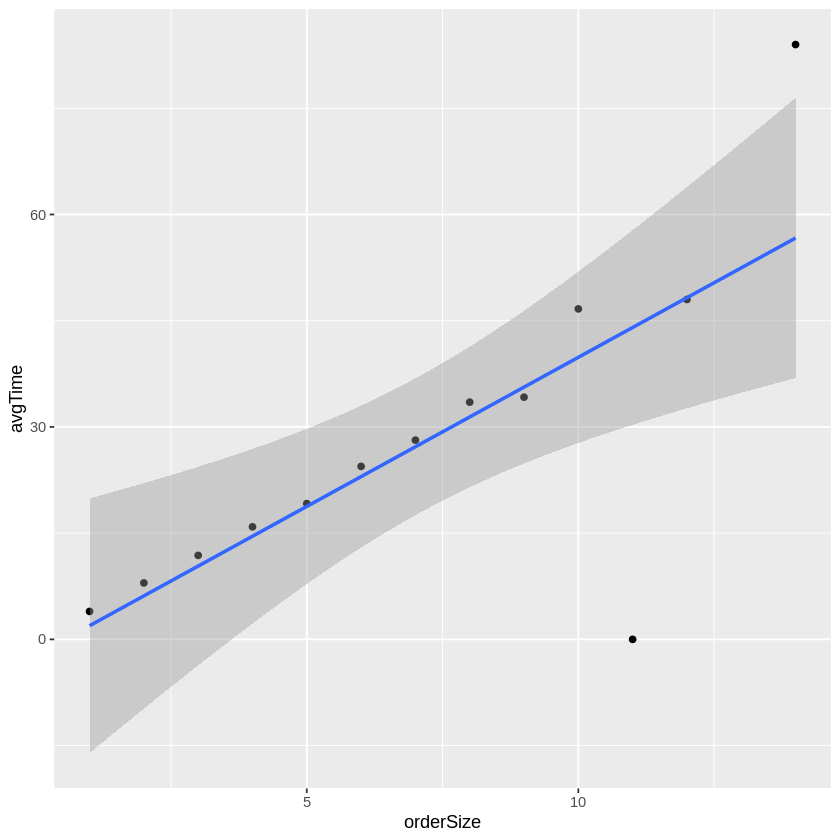

In [108]:
ggplot(orderSizeATime) + 
  geom_point(aes(x = orderSize, y = avgTime)) + 
  geom_smooth(aes(x = orderSize, y = avgTime), method='lm')

# 6

In [27]:
originFriday <- df %>%
                mutate(day = format(as.Date(Order.Date), format="%a")) %>% 
                group_by(day) %>% 
                summarise(n = n(), profit = sum(Profit)) %>% 
                filter(day == 'Fri')

In [28]:
boostedFriday <- df %>%
  mutate(day = format(as.Date(Order.Date), format="%a")) %>% 
  group_by(day) %>%
  summarise(n = n(), profit = sum(Profit)) %>% 
  mutate(n = ifelse(day == 'Fri', n * 1.5, n)) %>% 
  mutate(profit = ifelse(day == 'Fri', profit * 1.5, profit)) %>% 
  filter(day == 'Fri') %>% 
  mutate(day = 'BoostedFri')

In [32]:
boostedFriday$profit/originFriday$profit

[1] 1.5

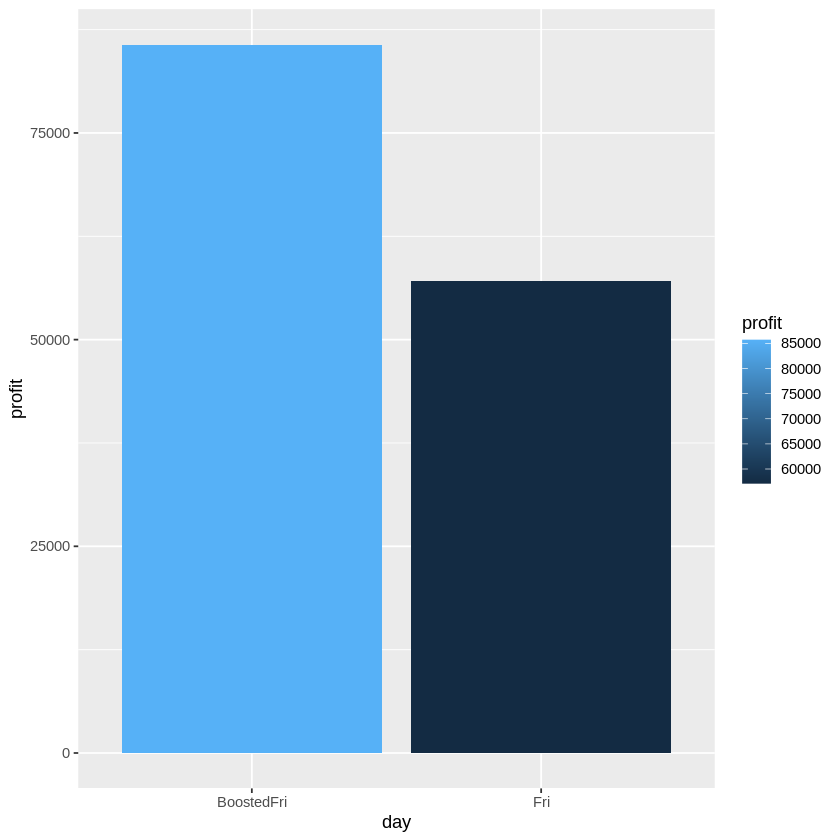

In [29]:
rbind(originFriday, boostedFriday) %>% 
  ggplot() +
  geom_col(aes(x = day, y = profit, fill = profit))

In [156]:
bootsFri <- df %>% 
  group_by(Order.Date, Order.ID	) %>% 
  summarise(n = 1) %>%
  summarise(n = sum(n)) %>%
  mutate(day = format(as.Date(Order.Date), format="%a")) %>%
  mutate(n = ifelse(day == 'Fri', n * 1.5, n))

`summarise()` has grouped output by 'Order.Date'. You can override using the `.groups` argument.



In [157]:
originFri <- df %>% 
  group_by(Order.Date, Order.ID	) %>% 
  summarise(n = 1) %>%
  summarise(n = sum(n))

`summarise()` has grouped output by 'Order.Date'. You can override using the `.groups` argument.



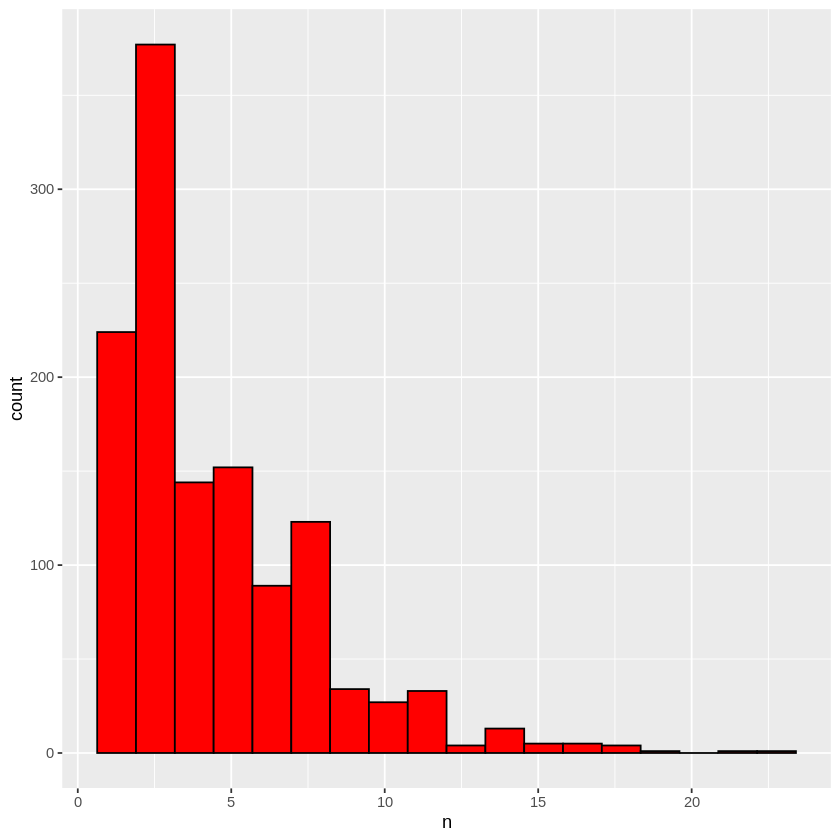

In [153]:
ggplot(bootsFri) + 
  geom_histogram(aes(x = n), fill='red',color='black',bins=18)

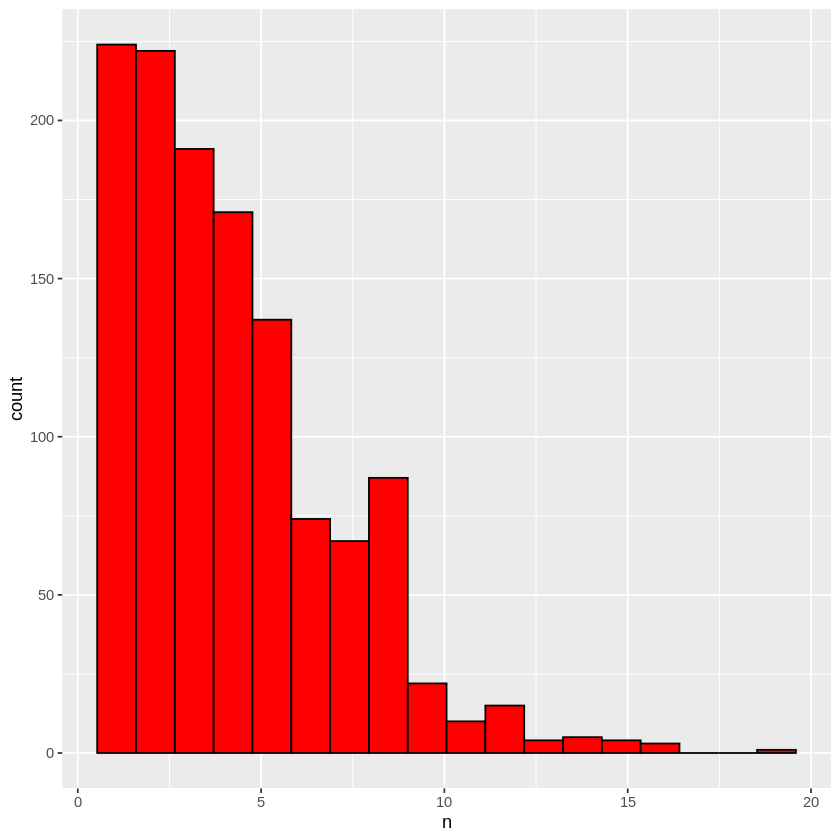

In [158]:
ggplot(originFri) + 
  geom_histogram(aes(x = n), fill='red',color='black',bins=18)

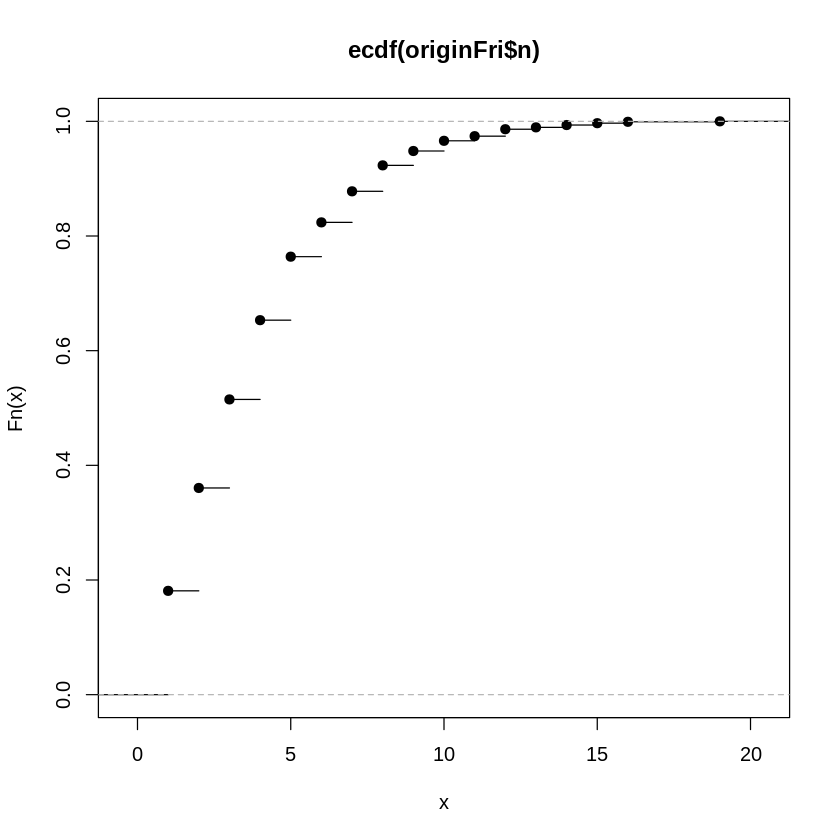

In [159]:
plot(ecdf(originFri$n))

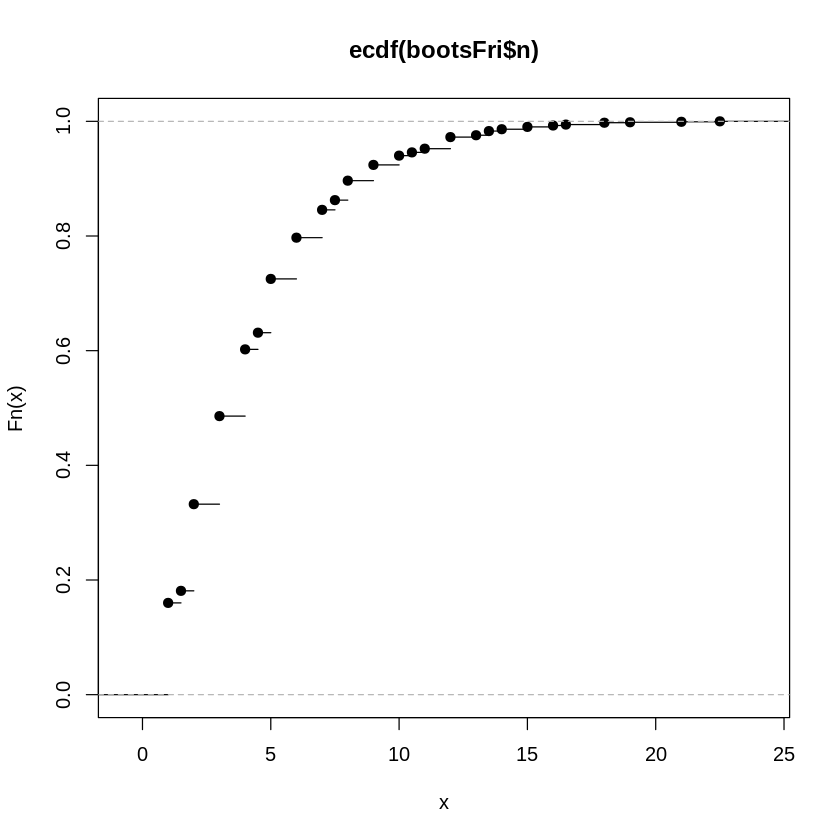

In [131]:
plot(ecdf(bootsFri$n))

In [ ]:
originFri